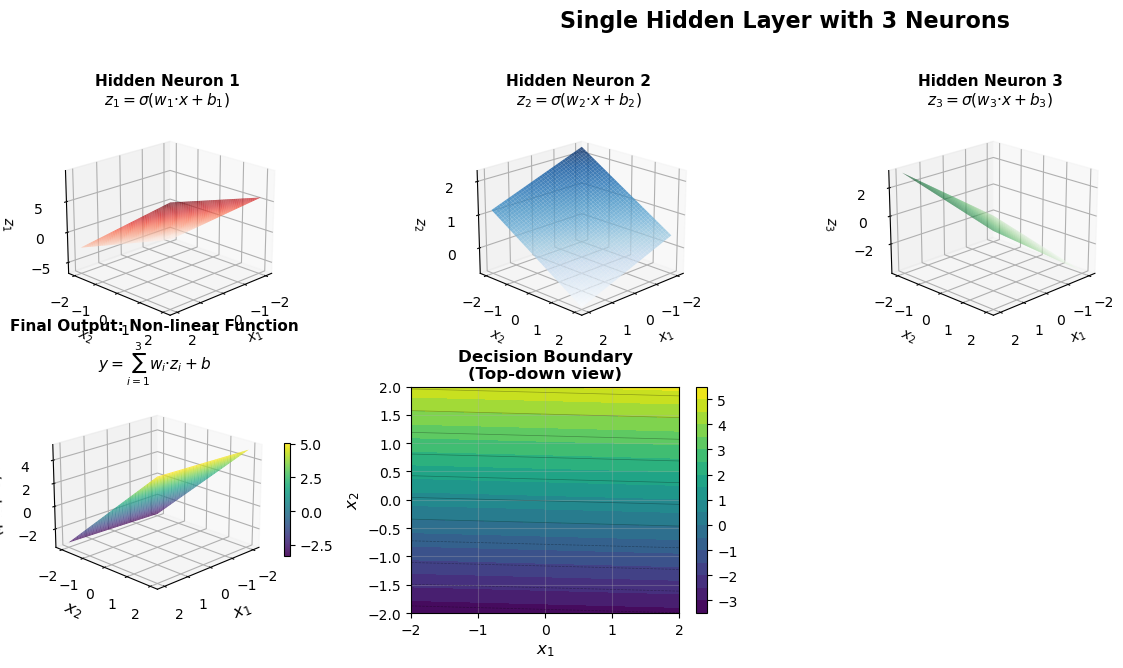


NETWORK STATISTICS
Number of hidden neurons: 3
Total parameters: 13
  - Input→Hidden weights: 6
  - Hidden biases: 3
  - Hidden→Output weights: 3
  - Output bias: 1

Weight ranges:
  - W1 (Input→Hidden): [-0.468, 3.046]
  - W2 (Hidden→Output): [-0.466, 0.543]


In [14]:


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ============================================================================
# Hyper PARAMETERS - MODIFY THESE TO EXPERIMENT!
# ============================================================================
N_HIDDEN_NEURONS = 3      # Try: 2, 3, 5, 10
GRID_RESOLUTION = 40      # Higher = smoother plots (but slower)
RANDOM_SEED = 42          # Change for different random weights
# ============================================================================

np.random.seed(RANDOM_SEED)

def sigmoid(x):
    """Non-linear activation function"""
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def relu(x):
    """Alternative activation: ReLU"""
    return np.maximum(0, x)

def unit(x):
    return x

def tanh(x):
    """Alternative activation: tanh"""
    return np.tanh(x)

# Initialize random weights
W1 = np.random.randn(2, N_HIDDEN_NEURONS) * 2  # Input -> Hidden
b1 = np.random.randn(N_HIDDEN_NEURONS)          # Hidden biases
W2 = np.random.randn(N_HIDDEN_NEURONS, 1)       # Hidden -> Output
b2 = np.random.randn(1) * 0.5                   # Output bias

# Create input grid
x1 = np.linspace(-2, 2, GRID_RESOLUTION)
x2 = np.linspace(-2, 2, GRID_RESOLUTION)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]

# Forward pass through network
# Step 1: Linear combination in hidden layer
Z_pre = np.dot(X_grid, W1) + b1  # Shape: (grid_points, n_hidden)

# Step 2: Apply non-linear activation
#Z_hidden = sigmoid(Z_pre)  # This creates non-linearity!
Z_hidden = unit(Z_pre)

# Step 3: Linear combination for output
Y_output = np.dot(Z_hidden, W2) + b2

# Reshape for plotting
Y_output = Y_output.reshape(X1.shape)
Z_activations = [Z_hidden[:, i].reshape(X1.shape) for i in range(N_HIDDEN_NEURONS)]

# ============================================================================
# VISUALIZATION
# ============================================================================

fig = plt.figure(figsize=(16, 8))
fig.suptitle(f'Single Hidden Layer with {N_HIDDEN_NEURONS} Neurons', 
             fontsize=16, fontweight='bold')

# Plot 1: Individual hidden neuron activations
for i in range(min(N_HIDDEN_NEURONS, 4)):  # Show max 4 neurons
    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    surf = ax.plot_surface(X1, X2, Z_activations[i], 
                          cmap=['Reds', 'Blues', 'Greens', 'Purples'][i], 
                          alpha=0.8, edgecolor='none')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel(f'$z_{i+1}$')
    ax.set_title(f'Hidden Neuron {i+1}\n$z_{i+1} = σ(w_{{{i+1}}} · x + b_{{{i+1}}})$', 
                 fontsize=11, fontweight='bold')
    ax.view_init(elev=20, azim=45)

# Plot 2: Final combined output (THE NON-LINEAR FUNCTION!)
ax_output = fig.add_subplot(2, 4, 5, projection='3d')
surf = ax_output.plot_surface(X1, X2, Y_output, cmap='viridis', 
                              alpha=0.9, edgecolor='none')
ax_output.set_xlabel('$x_1$', fontsize=12)
ax_output.set_ylabel('$x_2$', fontsize=12)
ax_output.set_zlabel('$y$ (output)', fontsize=11)
ax_output.set_title('Final Output: Non-linear Function\n' + 
                    f'$y = \\sum_{{i=1}}^{{{N_HIDDEN_NEURONS}}} w_i · z_i + b$',
                    fontsize=11, fontweight='bold')
ax_output.view_init(elev=20, azim=45)
fig.colorbar(surf, ax=ax_output, shrink=0.5)

# Plot 3: Contour plot (top-down view)
ax_contour = fig.add_subplot(2, 4, 6)
contour = ax_contour.contourf(X1, X2, Y_output, levels=20, cmap='viridis')
ax_contour.contour(X1, X2, Y_output, levels=10, colors='black', 
                   alpha=0.3, linewidths=0.5)
ax_contour.set_xlabel('$x_1$', fontsize=12)
ax_contour.set_ylabel('$x_2$', fontsize=12)
ax_contour.set_title('Decision Boundary\n(Top-down view)', fontweight='bold')
ax_contour.grid(True, alpha=0.3)
fig.colorbar(contour, ax=ax_contour)


plt.tight_layout(rect=[0, 0.15, 1, 0.96])
plt.show()

# Print some statistics for students
print("\n" + "="*70)
print("NETWORK STATISTICS")
print("="*70)
print(f"Number of hidden neurons: {N_HIDDEN_NEURONS}")
print(f"Total parameters: {2*N_HIDDEN_NEURONS + N_HIDDEN_NEURONS + N_HIDDEN_NEURONS*1 + 1}")
print(f"  - Input→Hidden weights: {2*N_HIDDEN_NEURONS}")
print(f"  - Hidden biases: {N_HIDDEN_NEURONS}")
print(f"  - Hidden→Output weights: {N_HIDDEN_NEURONS}")
print(f"  - Output bias: 1")
print(f"\nWeight ranges:")
print(f"  - W1 (Input→Hidden): [{W1.min():.3f}, {W1.max():.3f}]")
print(f"  - W2 (Hidden→Output): [{W2.min():.3f}, {W2.max():.3f}]") 